In [1]:
#importing the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#reading dataset
df=pd.read_csv('Wine.csv')
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
df.shape

(178, 13)

The dataset has 178 rows and 13 columns

In [4]:
df.dtypes

Alcohol                 float64
Malic_Acid              float64
Ash                     float64
Ash_Alcanity            float64
Magnesium                 int64
Total_Phenols           float64
Flavanoids              float64
Nonflavanoid_Phenols    float64
Proanthocyanins         float64
Color_Intensity         float64
Hue                     float64
OD280                   float64
Proline                   int64
dtype: object

In [5]:
#checking for null values
df.isnull().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

No null values present in dataset

In [6]:
df.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


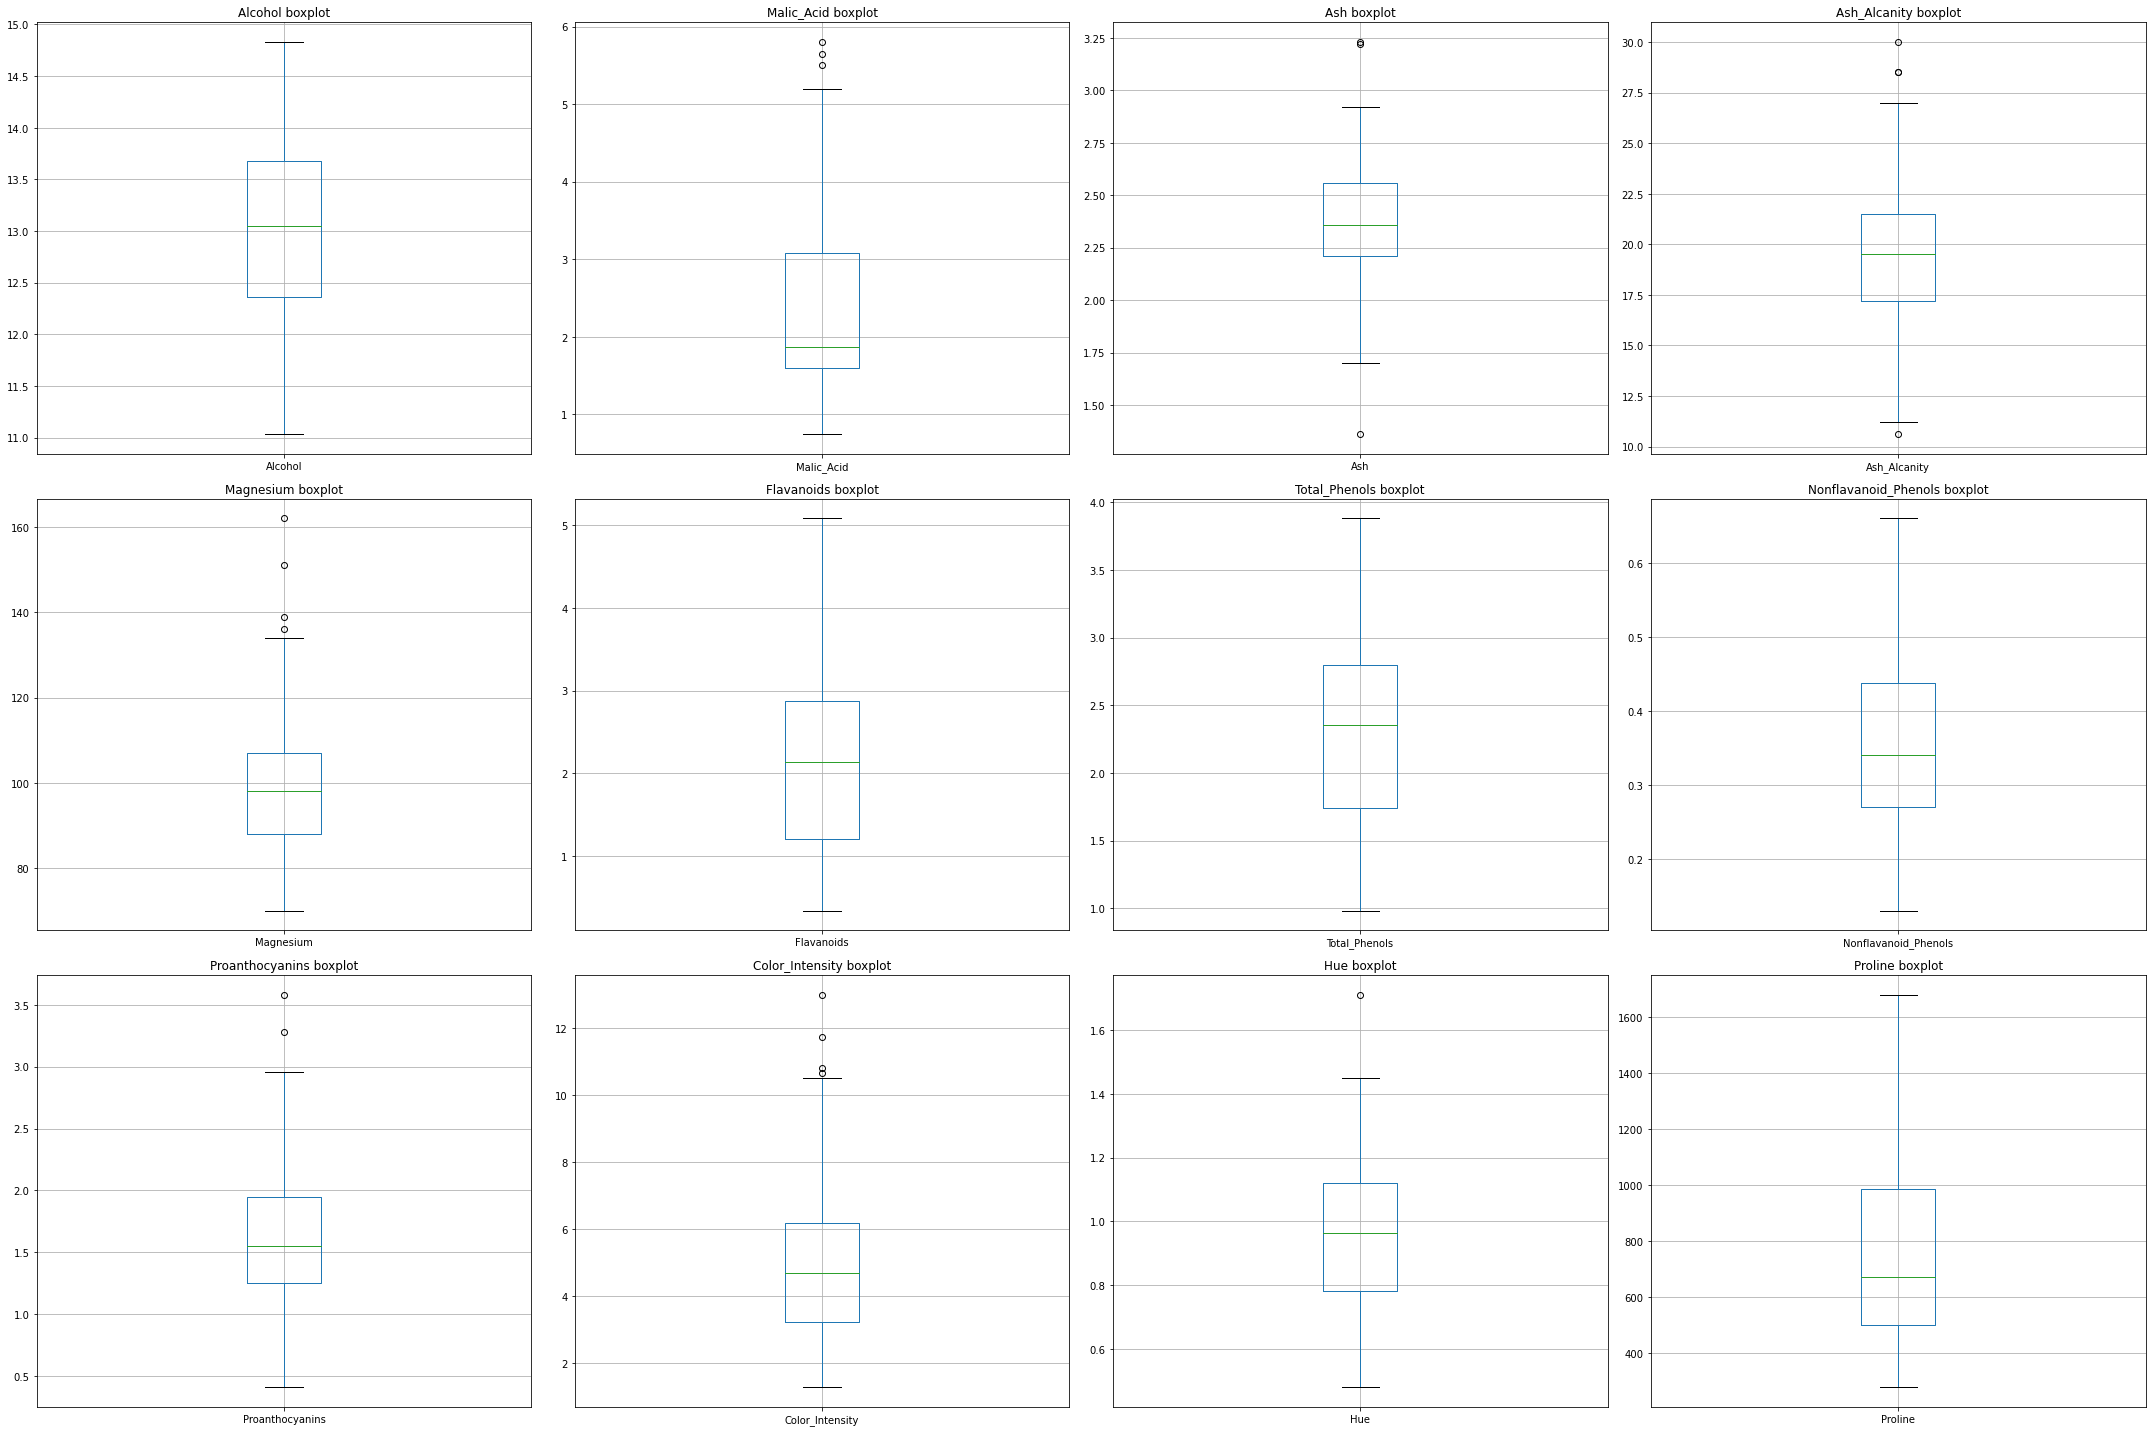

In [7]:
#checking for outliers in all columns
plt.figure(figsize=(30,20))
plt.subplot(3,4,1)
df.boxplot(column='Alcohol')
plt.title('Alcohol boxplot',fontsize=12)
plt.subplot(3,4,2)
df.boxplot(column='Malic_Acid')
plt.title('Malic_Acid boxplot',fontsize=12)
plt.subplot(3,4,3)
df.boxplot(column='Ash')
plt.title('Ash boxplot',fontsize=12)
plt.subplot(3,4,4)
df.boxplot(column='Ash_Alcanity')
plt.title('Ash_Alcanity boxplot',fontsize=12)
plt.subplot(3,4,5)
df.boxplot(column='Magnesium')
plt.title('Magnesium boxplot',fontsize=12)
plt.subplot(3,4,6)
df.boxplot(column='Flavanoids')
plt.title('Flavanoids boxplot',fontsize=12)
plt.subplot(3,4,7)
df.boxplot(column='Total_Phenols')
plt.title('Total_Phenols boxplot',fontsize=12)
plt.subplot(3,4,8)
df.boxplot(column='Nonflavanoid_Phenols')
plt.title('Nonflavanoid_Phenols boxplot',fontsize=12)
plt.subplot(3,4,9)
df.boxplot(column='Proanthocyanins')
plt.title('Proanthocyanins boxplot',fontsize=12)
plt.subplot(3,4,10)
df.boxplot(column='Color_Intensity')
plt.title('Color_Intensity boxplot',fontsize=12)
plt.subplot(3,4,11)
df.boxplot(column='Hue')
plt.title('Hue boxplot',fontsize=12)
plt.subplot(3,4,12)
df.boxplot(column='Proline')
plt.title('Proline boxplot',fontsize=12)
plt.tight_layout()

In [8]:
#Outlier handling using interquartile rule
outliers_list=['Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium','Proanthocyanins', 'Color_Intensity', 'Hue']
for i in outliers_list:
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    IQR = Q3 - Q1
    l_lim=Q1-1.5*IQR
    u_lim=Q3+1.5*IQR
    df[i].where(df[i] >=l_lim,l_lim, inplace=True)  #replacing all lower outliers with lower limit
    df[i].where(df[i] <=u_lim,u_lim, inplace=True)  #replacing all upper outliers with upper-limit

### K-Means

#### Elbow method

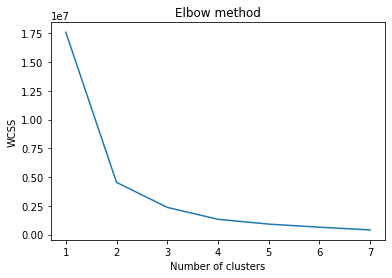

In [9]:
from sklearn.cluster import KMeans
from sklearn import metrics
wcss=[]
for i in range(1,8):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,8),wcss)
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

From the above elbow plot the optimum number of clusters can be 2 or 3

#### K-means modelling

In [10]:
for clusters in range(2,4):
    print(clusters," clustered K-Means\n")
    kmeans=KMeans(n_clusters=clusters,init='k-means++',random_state=42)
    y_kmeans=kmeans.fit_predict(df)
    print('silhouette score: ',metrics.silhouette_score(df, y_kmeans, metric='euclidean'))
    print('calinski harabasz score: ',metrics.calinski_harabasz_score(df, y_kmeans))
    print('davies bouldin score: ',metrics.davies_bouldin_score(df, y_kmeans))
    print('\n')

2  clustered K-Means

silhouette score:  0.6571518561319196
calinski harabasz score:  505.87358743763536
davies bouldin score:  0.47850262640906693


3  clustered K-Means

silhouette score:  0.571610031932576
calinski harabasz score:  562.758998616357
davies bouldin score:  0.5331068529071544




### Agglomerative Heirarchical Clustering

In [11]:
from scipy.cluster.hierarchy import dendrogram,linkage
from sklearn.cluster import AgglomerativeClustering

#### Dendrogram

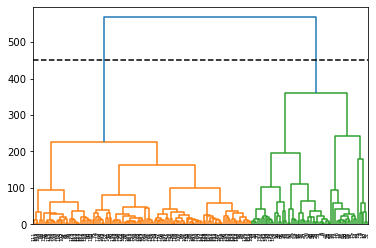

In [12]:
average_link = linkage(df, method='average',metric='euclidean')
dendrogram(average_link)
plt.hlines(450,0,5000,colors='black',linestyles='dashed' )
plt.show()

As per the above dendrogram the optimum number of clusters are 2

In [13]:
for clusters in range(2,3):
    print(clusters," clustered Agglomerative heirarchy\n")
    cluster = AgglomerativeClustering(n_clusters=clusters, affinity='euclidean', linkage='average')
    labels=cluster.fit_predict(df)
    print('silhouette score: ',metrics.silhouette_score(df, labels, metric='euclidean'))
    print('calinski harabasz score: ',metrics.calinski_harabasz_score(df, labels))
    print('davies bouldin score: ',metrics.davies_bouldin_score(df, labels))

2  clustered Agglomerative heirarchy

silhouette score:  0.6496963750630889
calinski harabasz score:  499.3180119142603
davies bouldin score:  0.4959331779158335


### Gaussian Mixture Model

In [14]:
from sklearn.mixture import GaussianMixture
for clusters in range(2,3):
    print(clusters," clustered Gaussian Mixture\n",)
    gmm=GaussianMixture(n_components=2,covariance_type='tied')
    labels=gmm.fit_predict(df)
    print('silhouette score: ',metrics.silhouette_score(df, labels, metric='euclidean'))
    print('calinski harabasz score: ',metrics.calinski_harabasz_score(df, labels))
    print('davies bouldin score: ',metrics.davies_bouldin_score(df, labels))
    print('Bayesian information criterion (BIC): ',gmm.bic(df))
    gm_df=pd.DataFrame(labels, columns =['cluster'],index=df.index)

2  clustered Gaussian Mixture

silhouette score:  0.5953302663694872
calinski harabasz score:  397.3840602906694
davies bouldin score:  0.5351993047915002
Bayesian information criterion (BIC):  7065.97029467596


### Best Clustering Model selection

#### From the above models we can conlcude that the K-means 2 clustered model is the best with highest silhouette score:  0.657, high calinski harabasz score:  505.87 and low davies bouldin score:  0.47

In [15]:
# Finding number of samples under each cluster in 2 clustered K-means modelling
kmeans=KMeans(n_clusters=2,init='k-means++',random_state=42)
y_kmeans=kmeans.fit_predict(df)
km_df=pd.DataFrame(y_kmeans, columns =['Cluster'],index=df.index)
print(km_df.value_counts())
clustered_df=pd.concat([df,km_df],axis=1)
clustered_df.head()

Cluster
0          123
1           55
dtype: int64


,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Cluster
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0


There are 123 samples under cluster 0 and 55 samples under sample 1 as per 2-clustered K-means model

In [16]:
# Average value of various parameters under the two clusters
cols=['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline']
clustered_df.groupby('Cluster')[cols].mean()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
Cluster,,,,,,,,,,,,,
0,12.702846,2.535996,2.339400,20.400407,96.682927,2.062114,1.641463,0.392683,1.449350,4.822520,0.907937,2.408211,565.869919
1,13.666545,1.870727,2.427818,17.415455,105.745455,2.816182,2.896545,0.292909,1.891818,5.520364,1.066655,3.066727,1151.727273
